# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/changhengwang/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


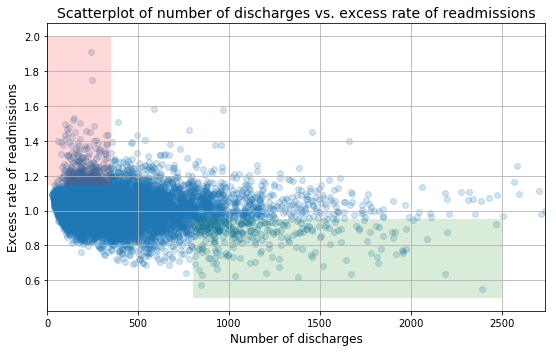

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
from scipy import stats
import numpy as np

In [16]:
df = clean_hospital_read_df
df = df[df['Number of Discharges'] > 0]
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


## Do you agree with the above analysis and recommendations? Why or why not?

I disagree with the above analysis and recommendations. The reasons for the disagreement are summarize as follows:

1. The initial observation section claims that the rate of readmission is trending down with increasing number of discharges. However, we could see from the regression result below that the observed negative correlation is rather insignificant, with a fairly low $r^2$ value. Furthermore, the shaded areas (red and green) are extremely misleading, as these areas do not represent where data points are densely clustered.

2. For the statistical analysis section, the analysis compares two groups of hospitals, one with number of discharges < 100 and one > 1000. However, only the mean excess readmission rate and the percentage of excess readmission rate greater than 1 are compared. Although we could see that the mean excess readmission rate is higher and that the percentage of excess readmission rate greater than 1 is higher for the group of hospitals with number of discharges < 100, we could not assess the statistical significance of the difference from the reported statistics.

3. The conclusions claim that there is a significant correlation between hospital capacity (number of discharges) and readmission rates, which is not true as we have seen in 1. and the following linear regression result. Also, I don't think the explanation provided has been properly justified.

4. The regulatory policy recommendations are based on the conclusions not properly justified as stated above. Also, even if we could justify the observed correlation, there is no guarantee that consolidating hospitals to higher capacity and number of discharges would decrease the excess readmission ratio, as we could not prove the causality of the two factors.

The r^2 value (or coeff. of determination) for this linear regression is: 8.12150154943e-12
The slope for this linear regression is: -2.85650529438e-05


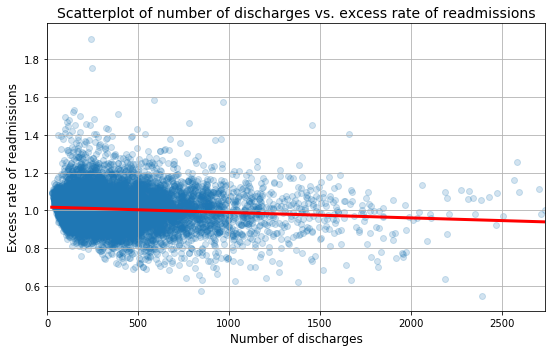

In [17]:
df = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]

# Get rid of 0 discharges
df = df[df['Number of Discharges'] != 0]

x1 = df['Number of Discharges']
y1 = df['Excess Readmission Ratio']

# Perform a linear regression on all data
slope, intercept, r_val, p_val, std_err = stats.linregress(x1,y1)
print "The r^2 value (or coeff. of determination) for this linear regression is:", std_err ** 2
print "The slope for this linear regression is:", slope

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1, alpha=0.2)
plt.plot(x1, (slope * x1 + intercept), 'r-', color='Red', linewidth=3.0)

ax.set_xlim([0, max(x1)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

## Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

We would like to analyze the mean excess readmission rates for hospitals with low and high number of discharges. In particular, we compare the two groups as in the preliminary analysis: number of discharges > 1000 as large hospital group, and < 100 as small hospital group. 

Let the mean excess readmission ratio of the large hospital group and that of the small hospital group be $\mu_l$ and $\mu_s$, respectively. The hypotheses we would like to test are:

$H_0: \mu_s < \mu_l$

$H_0: \mu_s \geq \mu_l$


### 2. Compute and report the observed significance value (or p-value).

We would use a one-sided T-test to test our hypotheses.

In [18]:
# separate the data set into two groups, based on number of discharges 
df = clean_hospital_read_df
small = df[df['Number of Discharges']<100]
large = df[df['Number of Discharges']>1000]

In [19]:
# use t-test to evaluate the hypothesis
T, p = stats.ttest_ind(small['Excess Readmission Ratio'].dropna(), 
                       large['Excess Readmission Ratio'].dropna(), 
                       equal_var=False)
# divide the p-value by 2, since we would like a one-sided test in this case
p = p / 2
print 'Test Statistic (T):', T
print 'p-value:', p

Test Statistic (T): 7.6017424185
p-value: 6.37621772557e-14


We get a positive t-statistics ($\mu_s - \mu_l > 0$) and the p-value $= 6.38 \times 10^{-14}$.

### 3. Report statistical significance for  $\alpha=0.01$.

Since the calculated p-value is far smaller than the designated significance level ($\alpha = 0.01$), we may reject the null hypothesis and claim that the group of small hospitals has larger mean excess readmission ratio.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?


Note that from the hypothesis testing result above, we may conclude that the difference in mean excess readmission ratio between groups of small hospitals (number of discharges < 100)

### 5. Look at the scatterplot above:
* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner.